In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
np.random.seed(123)

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
from keras.models import Sequential

In [6]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [7]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [8]:
from keras.utils import np_utils

## Load dataset


In [9]:
batch_size=128

In [10]:
nb_classes = 10

# Input image dimensions

In [11]:
img_rows,img_cols = 28, 28

# number of convolutional filters to use

In [12]:
nb_filters = 32

# the data, shuffled and split between tran and test sets

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
y_test.shape

(10000,)

# Reshape data

In [18]:
x_train = x_train.reshape( x_train.shape[0], 1, img_rows, img_cols)

In [19]:
x_train.shape

(60000, 1, 28, 28)

In [20]:
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

In [21]:
x_test.shape

(10000, 1, 28, 28)

In [22]:
x_train = x_train.astype("float32")

In [23]:
x_train.shape

(60000, 1, 28, 28)

In [24]:
x_test = x_test.astype("float32")

In [25]:
x_train /= 255

In [26]:
x_test /= 255

In [27]:
print( 'X_train_shape:', x_train.shape )

X_train_shape: (60000, 1, 28, 28)


In [28]:
print( x_train.shape[0], 'train samples')

60000 train samples


In [29]:
print( x_test.shape[0], 'test samples')

10000 test samples


# convert class vectors to binary class matrices

In [30]:
y_train.shape

(60000,)

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
y_train = np_utils.to_categorical( y_train, nb_classes)

In [33]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
y_train.shape

(60000, 10)

In [35]:
y_test = np_utils.to_categorical( y_test, nb_classes )

# In[3]

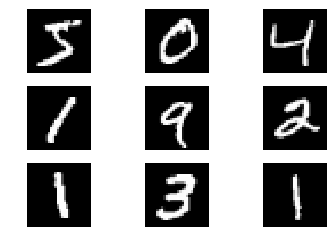

In [36]:
for i in range( 9 ):
    plt.subplot( 3, 3, i+1 )
    plt.imshow( x_train[i,0], cmap='gray' )
    plt.axis( 'off' )

# In[ ]

In [37]:
model = Sequential()

# Convolution2D

In [38]:
model.add( Convolution2D(32, (3, 3), activation='relu', input_shape = (1, img_rows, img_cols), data_format='channels_first') )

In [39]:
model.add( Convolution2D(64, (3, 3)) )

In [40]:
model.add( Activation('relu') )

In [41]:
model.add( MaxPooling2D(pool_size=(2, 2) ) )

In [42]:
model.add( Dropout(0.25) )

In [43]:
model.add( Flatten() )

In [44]:
model.add( Dense(128, activation='relu'))

In [45]:
model.add( Dropout(0.5) )

In [46]:
model.add( Dense(nb_classes, activation='softmax'))

In [47]:
model.compile( loss='categorical_crossentropy', optimizer='adadelta')

In [48]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 1, 28, 28),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_first',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_2',
    'trainable': True,
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
  

In [37]:
model.fit( x_train, y_train, 
          batch_size=128, 
          epochs=2,
          verbose=1,
          validation_data=(x_test,y_test)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 102s 2ms/step - loss: 0.3133 - val_loss: 0.0684
Epoch 2/2
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1039 - val_loss: 0.0514


In [41]:
score = model.evaluate(x_test, y_test, verbose=0)

In [43]:
score

0.05144234158599283

In [44]:
print('Test loss: ', score)

Test loss:  0.05144234158599283


In [45]:
res = model.predict_classes( x_test[:9] )

In [46]:
plt.figure( figsize = (10,10) )

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

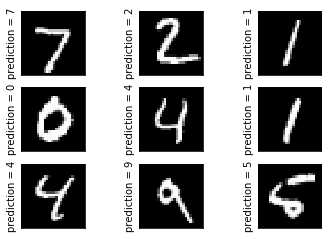

In [47]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i,0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = {}'.format( res[i], fontsize=18))

In [48]:
x_train

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

In [49]:
x_train.shape

(60000, 1, 28, 28)